# **Heart Attack Risk Prediction Using Clinical and Biochemical Indicators**

# **Importing Files**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Loading Dataset**

In [ ]:
# Load data
df = pd.read_excel('Heart attack data.xlsx')

# **EDA**

## **Dataset display**

In [ ]:
df.head()

,Age,Gender,Heart Rate,Pressure High,Pressure Low,Glucose,KCM,Troponin,Output
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,0.0
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,1.0
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,0.0
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,1.0
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,0.0


## **Target Distribution**

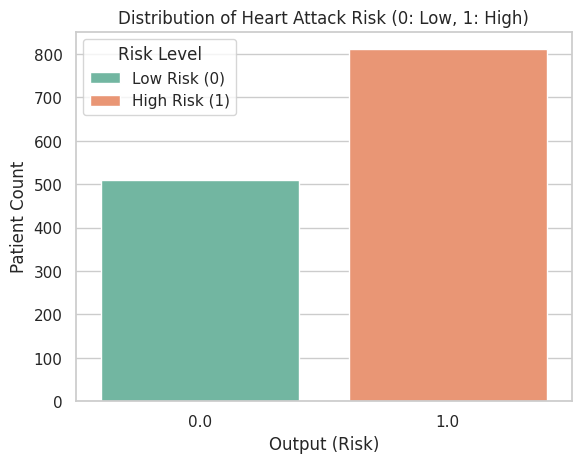

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style
sns.set_theme(style="whitegrid")

# Create the plot

ax = sns.countplot(data=df, x='Output', hue='Output', palette='Set2')

# Adding a legend
# To create a meaningful legend, we can define the handles/labels
# Or just let seaborn handle it if hue is used.
plt.legend(title='Risk Level', labels=['Low Risk (0)', 'High Risk (1)'])

plt.title('Distribution of Heart Attack Risk (0: Low, 1: High)')
plt.xlabel('Output (Risk)')
plt.ylabel('Patient Count')

# Save the plot
plt.savefig('target_distribution.png')

## **Correlational Heatmap**

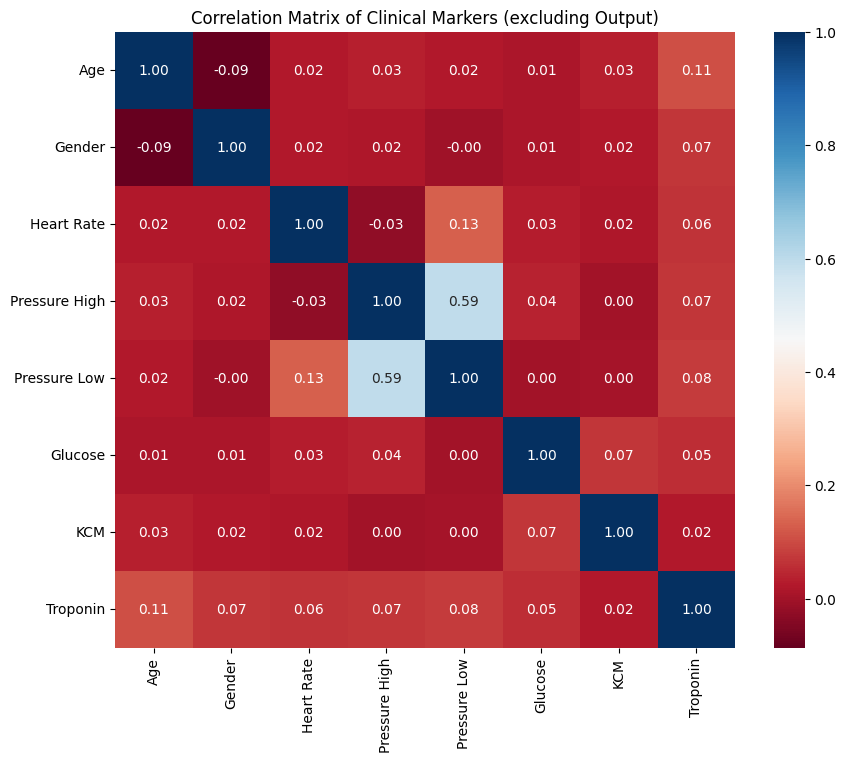

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
# Remove the 'Output' column from the correlation matrix
correlation_matrix = correlation_matrix.drop('Output', axis=1)
correlation_matrix = correlation_matrix.drop('Output', axis=0)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Matrix of Clinical Markers (excluding Output)')
plt.savefig('correlation_heatmap_no_output.png')

## **Box plot**

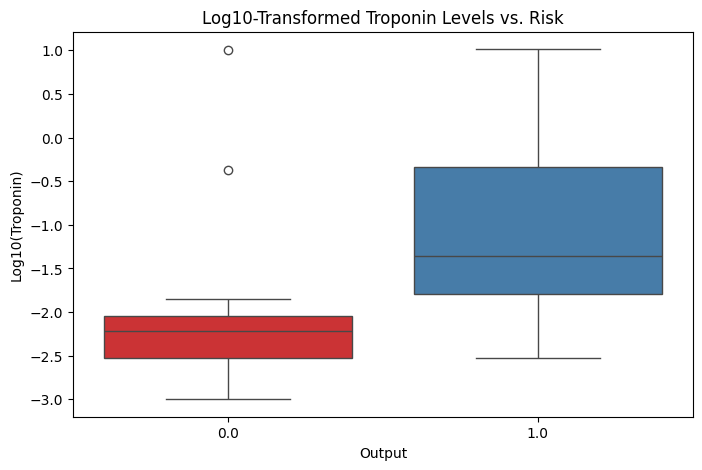

In [ ]:
plt.figure(figsize=(8, 5))
# Create a new column with log10 transformed Troponin values
df_plot = df.copy()
df_plot['Troponin_log10'] = np.log10(df_plot['Troponin'])
sns.boxplot(data=df_plot, x='Output', y='Troponin_log10', hue='Output', palette='Set1', legend=False)
plt.title('Log10-Transformed Troponin Levels vs. Risk')
plt.ylabel('Log10(Troponin)')
plt.savefig('troponin_boxplot_log10.png')

## **Scatter Plot**

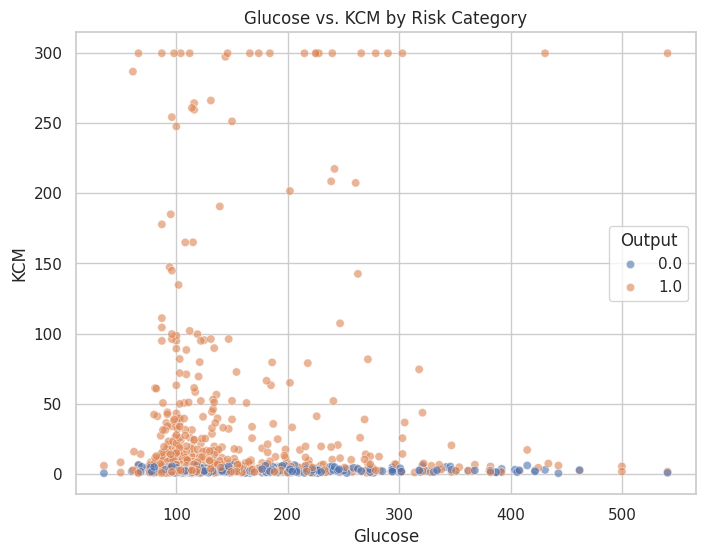

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='KCM', hue='Output', alpha=0.6)
plt.title('Glucose vs. KCM by Risk Category')
plt.savefig('glucose_kcm_scatter.png')

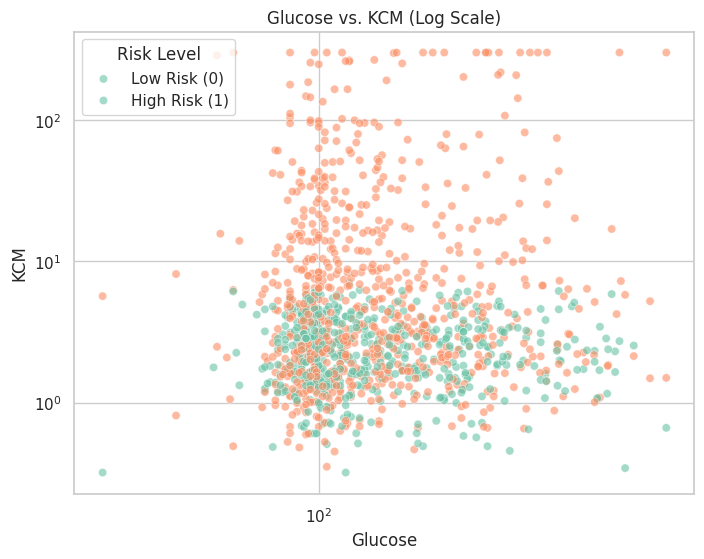

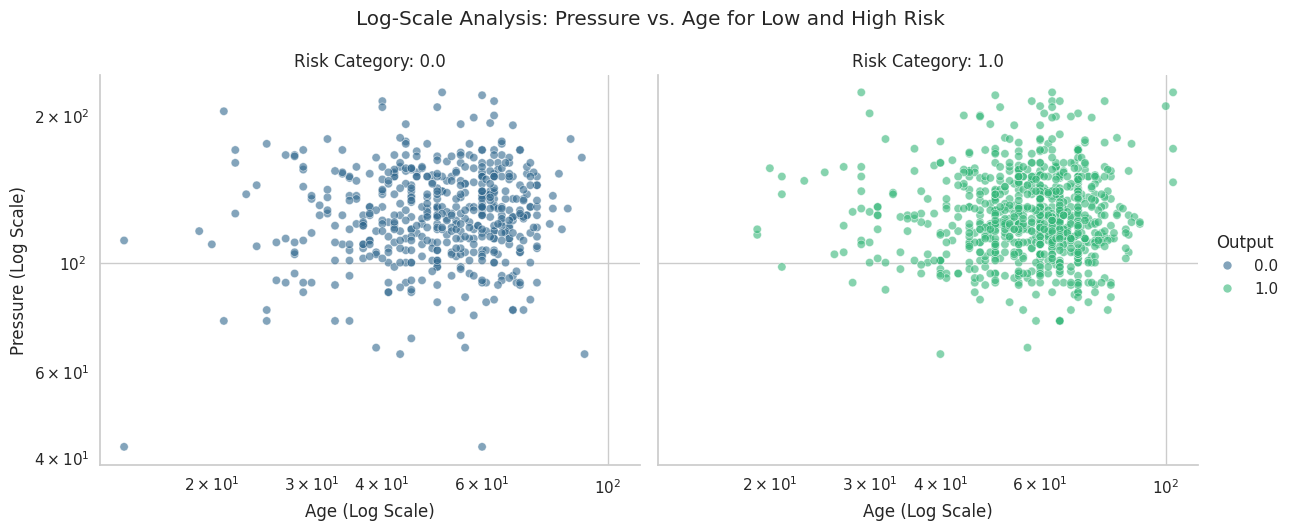

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# 1. Glucose vs. KCM (Log Scale)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='KCM', hue='Output', alpha=0.6, palette='Set2')
plt.xscale('log')
plt.yscale('log')
plt.title('Glucose vs. KCM (Log Scale)')
plt.legend(title='Risk Level', labels=['Low Risk (0)', 'High Risk (1)'])
plt.savefig('glucose_kcm_scatter_log.png')

# 2. High Pressure vs. Age (Divided by Risk Category)
# I use relplot with col='Output' to create two separate side-by-side plots
g = sns.relplot(
    data=df,
    x='Age',
    y='Pressure High',
    col='Output',
    hue='Output',
    alpha=0.6,
    palette='viridis',
    kind='scatter',
    height=5,
    aspect=1.2
)

# Apply log scale to both subplots and both axes
for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')

# Add titles and labels
g.fig.suptitle('Log-Scale Analysis: Pressure vs. Age for Low and High Risk', y=1.05)
g.set_axis_labels("Age (Log Scale)", "Pressure (Log Scale)")
g.set_titles("Risk Category: {col_name}")

plt.savefig('age_pressure_split_log.png')
plt.show()

# **Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop missing values
df = df.dropna()

# Features and Target
X = df.drop('Output', axis=1)
y = df['Output']

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

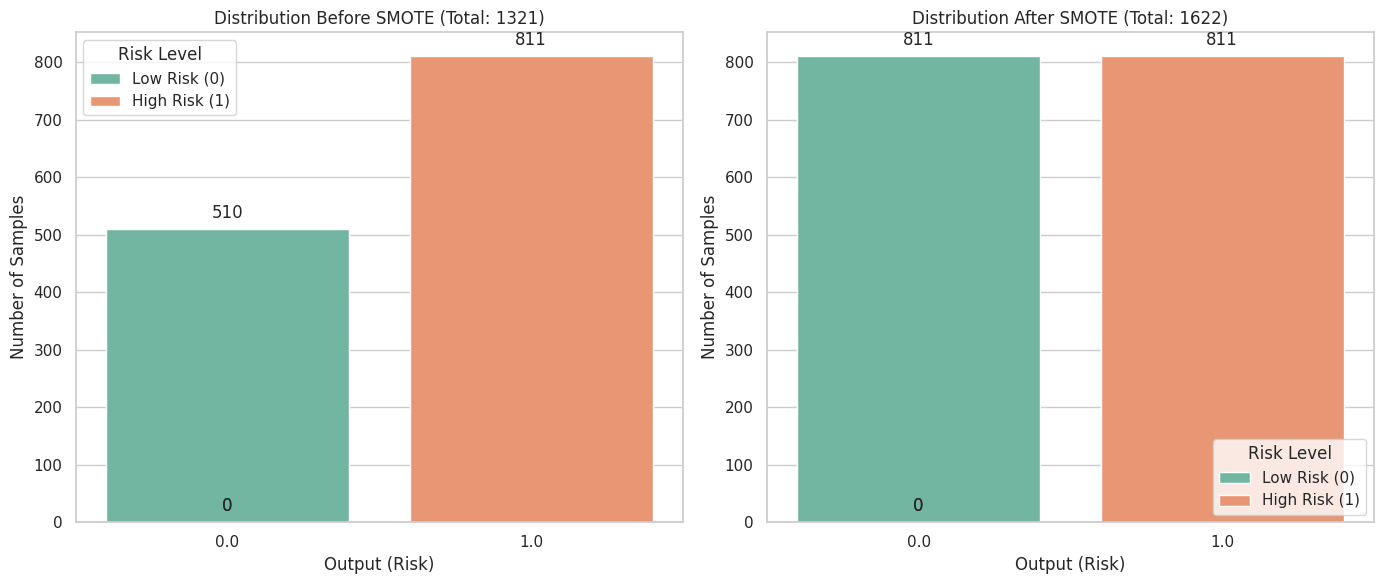

In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Prepare Features and Target
X = df.drop('Output', axis=1)
y = df['Output']

# 2. Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 3. Visualization Before and After
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Slightly wider for legend space

# Define legend labels
legend_labels = ['Low Risk (0)', 'High Risk (1)']

# Plot Before SMOTE
sns.countplot(x=y, ax=axes[0], palette='Set2', hue=y)
axes[0].set_title(f'Distribution Before SMOTE (Total: {len(y)})')
axes[0].set_xlabel('Output (Risk)')
axes[0].set_ylabel('Number of Samples')
axes[0].legend(title="Risk Level", labels=legend_labels)

# Add bar labels for 'Before'
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, xytext=(0, 5),
                textcoords='offset points')

# Plot After SMOTE
sns.countplot(x=y_res, ax=axes[1], palette='Set2', hue=y_res)
axes[1].set_title(f'Distribution After SMOTE (Total: {len(y_res)})')
axes[1].set_xlabel('Output (Risk)')
axes[1].set_ylabel('Number of Samples')
axes[1].legend(title="Risk Level", labels=legend_labels)

# Add bar labels for 'After'
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# **Model Training and Evaluation**

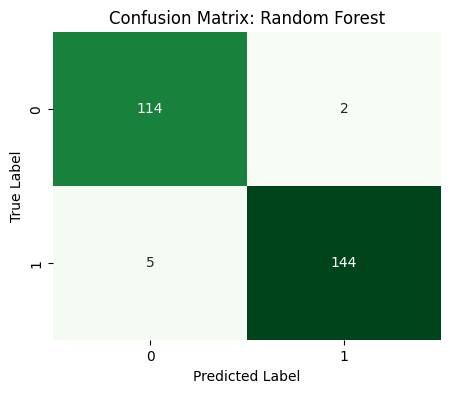

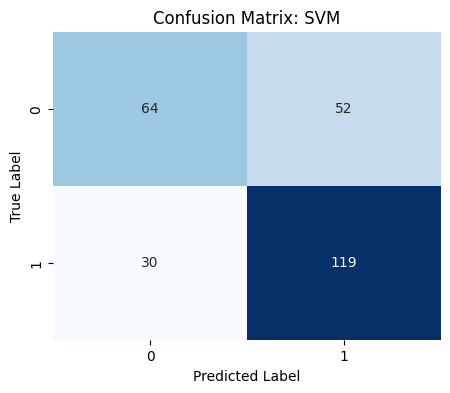

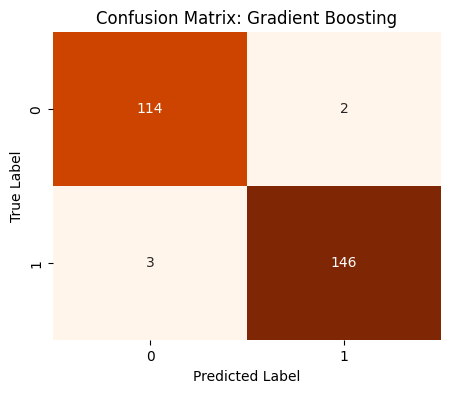

--- Model Evaluation Summary ---
                   Accuracy  Precision  Recall  F1 Score  ROC AUC
Random Forest        0.9736     0.9863  0.9664    0.9763   0.9894
SVM                  0.6906     0.6959  0.7987    0.7438   0.7917
Gradient Boosting    0.9811     0.9865  0.9799    0.9832   0.9896


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Initialize 3 Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}
cm_colors = ['Greens', 'Blues', 'Oranges'] # Different colors for each CM

for i, (name, model) in enumerate(models.items()):
    # Training
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate Metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_probs)
    }

    # Plot Confusion Matrix with unique color
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cm_colors[i], cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Print Summarized Evaluation Metrics
summary_df = pd.DataFrame(results).T
print("--- Model Evaluation Summary ---")
print(summary_df.round(4))

## **ROC Curve**

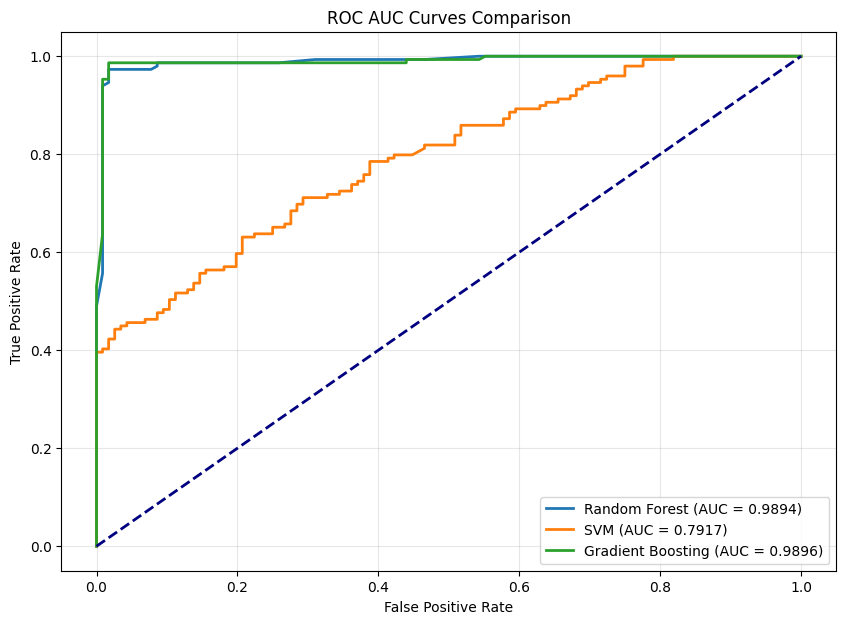

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()